<img src='images/codi_logo.png' width=250></img>
<h3>Programming for A Better Future</h3>
<h4>Workshop by <i>Hani El-Sayyed</i></h4>

The Codi Data Science & Machine Learning workshop will take you through exploring a (public) dataset using Python plus an open-source stack of DS & ML tools.

The dataset is featured on <a href='https://www.kaggle.com/c/titanic'>Kaggle</a>, a data science competitions platform.

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore') 

<h2>Data</h2>

<img src='images/600px-RMS_Titanic_3.jpg' width=350></img>

* On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.
* This sensational tragedy shocked the international community and led to better safety regulations for ships.
* One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
* Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others.
* <b>Goal #1 of the workshop is to understand what elements led to survival through explantory data analysis.
* <b>Goal #2 of the workshop is to prepare and clean the data.
* <b>Goal #3 is to create a predictive model that predicts whether a passenger would have survived using cleaned data. </b>

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
combined = [train_df, test_df]

In [3]:
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
499,500,0,3,"Svensson, Mr. Olof",male,24.0,0,0,350035,7.7958,NaN,S
202,203,0,3,"Johanson, Mr. Jakob Alfred",male,34.0,0,0,3101264,6.4958,NaN,S
57,58,0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,NaN,C
611,612,0,3,"Jardin, Mr. Jose Neto",male,NaN,0,0,SOTON/O.Q. 3101305,7.0500,NaN,S


* PassengerId: Passenger ID
* Survived: Passenger Survival Indicator
* Pclass: Passenger Class
* Name: Name
* Sex: Sex
* Age: Age
* SibSp: Number of Siblings/Spouses Aboard
* Parch: Number of Parents/Children Aboard
* Ticket: Ticket Number
* Fare: Passenger Fare
* Cabin: Cabin
* Embarked: Port of Embarkation

In [4]:
import pandas_profiling
pandas_profiling.ProfileReport(train_df)

Number of variables,12
Number of observations,891
Total Missing (%),8.1%
Total size in memory,83.6 KiB
Average record size in memory,96.1 B
Numeric,6
Categorical,4
Boolean,1
Date,0
Text (Unique),1
Rejected,0


<h2>Explanatory Data Analysis</h2>

<h4>What is the distribution of features across the data?</h4>

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Coutts, Master. William Loch ""William""",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


<h4>How many survived?</h4>

In [7]:
train_df.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

<h4>Are there any specific features correlated with survival?</h4>

In [8]:
train_df[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [9]:
pd.crosstab(train_df.Pclass,train_df.Survived,margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [10]:
train_df[["Sex", "Survived"]].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [11]:
train_df[["SibSp", "Survived"]].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [12]:
train_df[["Parch", "Survived"]].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


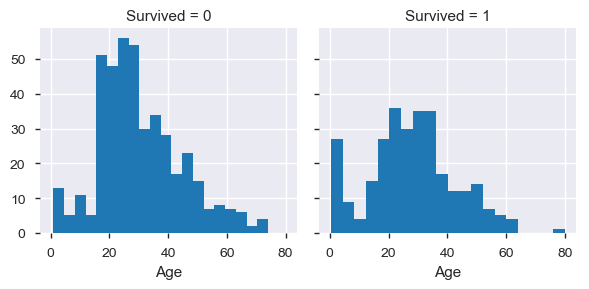

In [13]:
grd = sns.FacetGrid(train_df, col='Survived')
grd.map(plt.hist, 'Age', bins=20)
#notice we need to group ages when designing our model

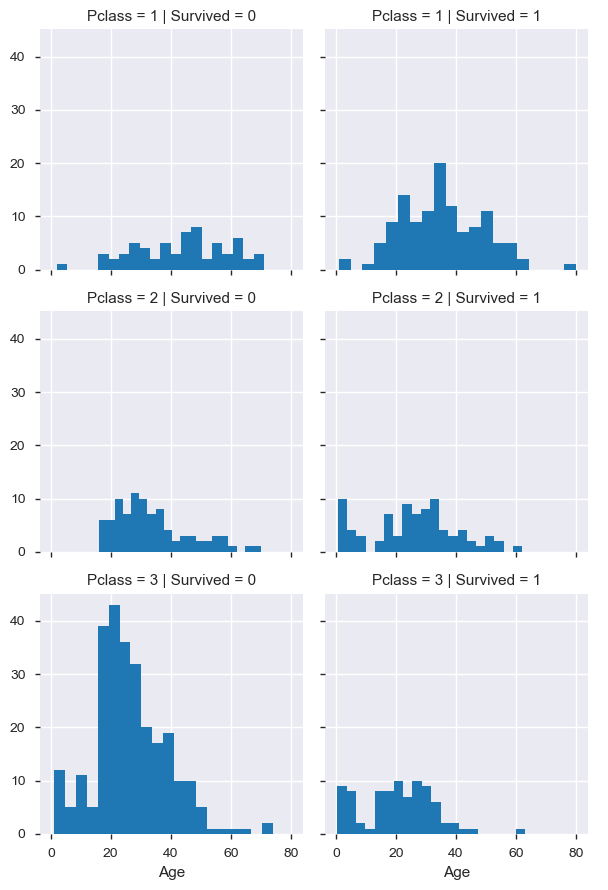

In [14]:
grd = sns.FacetGrid(train_df, col='Survived', row='Pclass')
grd.map(plt.hist, 'Age', bins=20)
grd.add_legend()

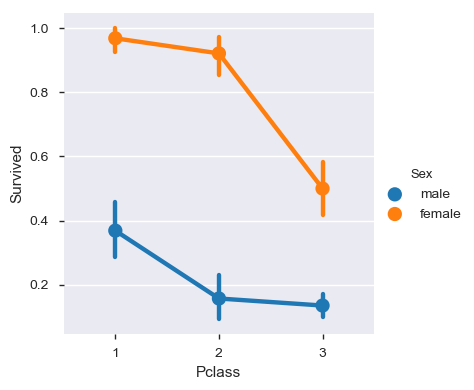

In [15]:
sns.factorplot('Pclass','Survived',hue='Sex',data=train_df)
plt.show()

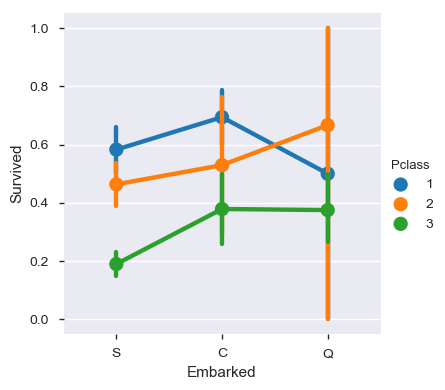

In [16]:
sns.factorplot('Embarked','Survived',hue='Pclass',data=train_df)
plt.show()

In [17]:
print('Oldest passenger:',train_df['Age'].max(),'years')
print('Youngest passenger:',train_df['Age'].min(),'years')
print('Average age on the Titanic:',round(train_df['Age'].mean(), 2),'years')

Oldest passenger: 80.0 years
Youngest passenger: 0.42 years
Average age on the Titanic: 29.7 years


## Key Observations
* The chance of survival for women is high as compared to men.
* 1st class passenger increases chances of survival.
* Children do have a higher chance of survival. Passengers between age group 15 to 35 had the least survival rate.
* The chances of survival at C looks to be better than Pclass1 passengers got at S.
* Having a larger family size is correlated with lower chance of survival.

<h2>Cleaning the Data + Feature Engineering</h2>
<h4>4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting</h4>

In [18]:
print('Train columns with null values:\n\n', train_df.isnull().sum())

Train columns with null values:

 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [19]:
train_df = train_df.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1) #correcting by dropping Cabin because it contains null values, and tickets since it has duplicates
test_df = test_df.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

In [20]:
#Creating a new title feature from Name
for df in combine:
    df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [21]:
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [22]:
#Creating a new title feature from Name
for df in combine:
    df['Title'].replace(['Mlle','Mme','Ms','Ddr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mrs'],inplace=True)

In [23]:
pd.concat([train_df, test_df]).groupby('Title')['Age'].mean()

Title
Dr        43.571429
Master     5.482642
Miss      21.834533
Mr        32.413823
Mrs       37.046243
Other     44.923077
Name: Age, dtype: float64

In [24]:
#Correct null values in Age using Title
for df in combine:
    df.loc[(df.Age.isnull())&(df.Title=='Dr'),'Age']=44
    df.loc[(df.Age.isnull())&(df.Title=='Mr'),'Age']=32
    df.loc[(df.Age.isnull())&(df.Title=='Mrs'),'Age']=37
    df.loc[(df.Age.isnull())&(df.Title=='Master'),'Age']=6
    df.loc[(df.Age.isnull())&(df.Title=='Miss'),'Age']=22
    df.loc[(df.Age.isnull())&(df.Title=='Other'),'Age']=45

In [25]:
pd.concat([train_df, test_df]).Age.isnull().any()

False

In [26]:
pd.concat([train_df, test_df]).groupby('Title')['Survived'].mean()

Title
Dr        0.428571
Master    0.575000
Miss      0.704301
Mr        0.159004
Mrs       0.795276
Other     0.111111
Name: Survived, dtype: float64

In [27]:
#converting title and sex to categorical
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Other": 6}

for df in combine:
    df['Title'] = df['Title'].map(title_mapping)
    df['Title'] = df['Title'].fillna(0)
    df['Sex'] = df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [28]:
#Completing null values in Embarked feature
port = train_df.Embarked.dropna().mode()[0]
for df in combine:
    df['Embarked'] = df['Embarked'].fillna(port)

#converting a categorical feature to numeric
for df in combine:
    df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [29]:
#Complete missing fare with median
for df in combine:        
    df['Fare'].fillna(df['Fare'].median(), inplace = True)

In [30]:
#Create new features based on SibSp and Parch
for df in combine:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = 1
    df['IsAlone'].loc[df['FamilySize'] > 1] = 0

In [31]:
train_df[['FamilySize', 'Survived']].groupby(['FamilySize']).mean().sort_values(by='Survived', ascending=False)

,Survived
FamilySize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


In [32]:
train_df[['IsAlone', 'Survived']].groupby(['IsAlone']).mean()

,Survived
IsAlone,
0,0.505650
1,0.303538


In [33]:
#Create AgeBand features, maximum age is 80, 5 bins total means 16 bin size
for df in combine:
    df['AgeBand']=0
    df.loc[df['Age']<=16,'AgeBand']=0
    df.loc[(df['Age']>16)&(df['Age']<=32),'AgeBand']=1
    df.loc[(df['Age']>32)&(df['Age']<=48),'AgeBand']=2
    df.loc[(df['Age']>48)&(df['Age']<=64),'AgeBand']=3
    df.loc[df['Age']>64,'AgeBand']=4

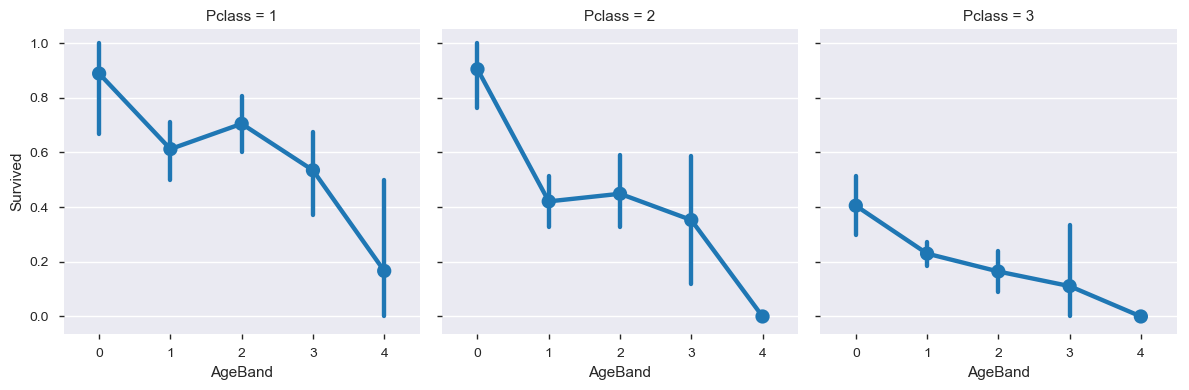

In [34]:
sns.factorplot('AgeBand','Survived',data=train_df,col='Pclass')
plt.show()

In [35]:
pd.qcut(train_df['Fare'],4).sample(10)

459     (-0.001, 7.91]
578     (14.454, 31.0]
863    (31.0, 512.329]
751     (7.91, 14.454]
64      (14.454, 31.0]
367     (-0.001, 7.91]
562     (7.91, 14.454]
731     (14.454, 31.0]
824    (31.0, 512.329]
833     (-0.001, 7.91]
Name: Fare, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

In [36]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [37]:
#Create FareBand feature
for df in combine:
    df.loc[df['Fare'] <= 7.91, 'Fare'] = 0
    df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
    df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare']   = 2
    df.loc[df['Fare'] > 31, 'Fare'] = 3
    df['Fare'] = df['Fare'].astype(int)

In [38]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title', 'FamilySize', 'IsAlone', 'AgeBand', 'FareBand'],
      dtype='object')

In [39]:
#Drop unneeded features, better to use IsAlone as main feature for family size
train_df = train_df.drop(['Name', 'Parch', 'SibSp', 'FamilySize', 'FareBand', 'Age'], axis=1)
test_df = test_df.drop(['Name', 'Parch', 'SibSp', 'FamilySize','Age'], axis=1)
combine = [train_df, test_df]

In [40]:
train_df.sample(10)

,Survived,Pclass,Sex,Fare,Embarked,Title,IsAlone,AgeBand
858,1,3,1,2,1,3,0,1
532,0,3,0,0,1,1,0,1
852,0,3,1,2,1,2,0,0
126,0,3,0,0,2,1,1,1
738,0,3,0,0,0,1,1,1
765,1,1,1,3,0,3,0,3
717,1,2,1,1,0,2,1,1
691,1,3,1,1,1,2,0,0
162,0,3,0,0,0,1,1,1
142,1,3,1,2,0,3,0,1


<h2>Machine Learning</h2>

In [41]:
X_train, X_val, Y_train, Y_val = train_test_split(train_df.drop("Survived", axis=1), train_df["Survived"], test_size=0.2, random_state=True)
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((712, 7), (712,), (179, 7), (179,))

In [42]:
#Fit a machine learning model on training data
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_val)
accuracy_score(Y_val, Y_pred)

0.770949720670391

In [43]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.131160
4,Title,0.516233
3,Embarked,0.298914
5,IsAlone,0.054254
2,Fare,-0.097203
6,AgeBand,-0.411285
0,Pclass,-1.229798


In [44]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
Y_pred = dt.predict(X_val)
accuracy_score(Y_val, Y_pred)

0.776536312849162

In [1]:
sns.heatmap(confusion_matrix(Y_val,Y_pred), annot=True,fmt='2.0f')

NameError: name 'sns' is not defined

In [46]:
from sklearn.model_selection import GridSearchCV

max_depth=range(100,1000,100)
hyper={'max_depth':max_depth}
grd=GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),param_grid=hyper,verbose=True)
grd.fit(X_train,Y_train)
print(grd.best_score_)
print(grd.best_estimator_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
0.8160112359550562
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.1s finished


In [47]:
Y_pred = grd.best_estimator_.predict(X_val)
accuracy_score(Y_val, Y_pred)

0.776536312849162

<h3>YOUR TURN...</h3>

In [48]:
#insert code here